In [1]:
import pandas as pd
import numpy as np

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import matplotlib.pyplot as plt

import ast

C:\Users\suyog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
ner_data = pd.read_csv('sheets/extracted/ner_extracted_2.csv', index_col=0)
ner_data = ner_data.drop_duplicates(subset='filename')
ner_data.reset_index(drop=True, inplace=True)
ner_data

FileNotFoundError: [Errno 2] No such file or directory: 'ner_extracted_2.csv'

In [ ]:
gpt_data = pd.read_csv('openai_extracted.csv', index_col=0)
gpt_data = gpt_data[gpt_data['file_name'].isin(ner_data['filename'])]
gpt_data

file_name  \
0    Abhijeet_Suryakant_Maske_And_Anr_vs_The_State_...   
1            Amluya_Anand_vs_State_on_8_March_2022.PDF   
2    Arulmurugan_Starch_Industries_vs_Food_Safety_A...   
3    Arun_Raosaheb_Khot_vs_State_Of_Maharashtra_on_...   
4    Asha_Singh_vs_The_State_Of_Bihar_on_24_March_2...   
..                                                 ...   
191  Vijaysing_Dnyaneshwar_Gotya_S_O_vs_State_Of_Mh...   
192  Viky_Vikash_Ku_Agrawal_vs_State_Of_Odisha_Opp_...   
193  Vishnu_Gupta_Lalla_vs_The_State_Of_Madhya_Prad...   
194  V_Balakrishnan_vs_The_State_Represented_By_on_...   
195               WP_C__4368_2014_on_25_March_2022.PDF   

                                               summary  \
0    In the case of Abhijeet Suryakant Maske and An...   
1    **Case Summary: Amluya Anand vs State (8 March...   
2    **Case Summary: Arulmurugan Starch Industries ...   
3    In the case of Arun Raosaheb Khot vs. State of...   
4    In the case of Asha Singh vs The State of Biha...   
..                                                 ...   
191  **Case Summary: Vijaysing @ Dnyaneshwar @ Goty...   
192  In the case of Viky @ Vikash Ku Agrawal vs Sta...   
193  On January 3, 2022, the High Court of Madhya P...   
194  **Case Summary: V.Balakrishnan vs The State Re...   
195  On March 25, 2022, the Gauhati High Court deli...   

                                                 court  \
0                   HIGH COURT OF JUDICATURE AT BOMBAY   
1    HIGH COURT OF JUDICATURE FOR RAJASTHAN AT JODHPUR   
2                   High Court of Judicature at Madras   
3                   High Court of Judicature at Bombay   
4                    HIGH COURT OF JUDICATURE AT PATNA   
..                                                 ...   
191   High Court of Judicature at Bombay, Nagpur Bench   
192                    High Court of Orissa at Cuttack   
193                       High Court Of Madhya Pradesh   
194                 High Court of Judicature at Madras   
195  The Gauhati High Court (High Court of Assam, N...   

                                           petitioners  \
0    ['Abhijeet Suryakant Maske', 'Dilip Ramchandra...   
1                                     ['Amluya Anand']   
2                    ['Arulmurugan Starch Industries']   
3                               ['Arun Raosaheb Khot']   
4                                       ['Asha Singh']   
..                                                 ...   
191  ['Vijaysing @ Dnyaneshwar @ Gotya Raghunandan ...   
192                       ['Viky @ Vikash Ku Agrawal']   
193                           ['Vishnu Gupta @ Lalla']   
194                                 ['V.Balakrishnan']   
195  ['Sri Konto Warisa', 'Smt. Sopola Nunisa', 'Sr...   

                                           respondents  \
0                         ['The State of Maharashtra']   
1    ['State, Through Vinod Sharma, Food Safety Off...   
2    ['Food Safety and Standards Authority of India...   
3                         ['The State of Maharashtra']   
4    ['The State of Bihar', 'THE UNION OF INDIA THR...   
..                                                 ...   
191                           ['State of Maharashtra']   
192                                ['State of Odisha']   
193                    ['The State Of Madhya Pradesh']   
194  ['The State Represented By', 'Tamil Nadu Food ...   
195  ['The Union of India', 'The Group Commandant, ...   

                                     judges        date  \
0                          ['C.V. Bhadang']  01-03-2022   
1                         ['Sandeep Mehta']  08-03-2022   
2                     ['Krishnan Ramasamy']  19-01-2022   
3                          ['C.V. Bhadang']  31-01-2022   
4                        ['Ashutosh Kumar']  24-03-2022   
..                                      ...         ...   
191                  ['Avinash G. Gharote']  13-01-2022   
192                          ['S.K. Sahoo']  09-02-2022   
193                         [

In [ ]:
def clean_columns(df, rows):
    for row in rows:
        df[row] = df[row].apply(lambda x: ast.literal_eval(x))
        df[row] = df[row].apply(lambda x: [i.lower() for i in x])
    return df

In [ ]:
def deduplicate(df, rows):
    for row in rows:
        df[row] = df[row].apply(lambda x: list(set(x)))
    return df

In [ ]:
list_rows = ['petitioners', 'respondents', 'judges', 'org', 'gpe', 'provisions', 'statutes', 'precedents']

ner_data = clean_columns(ner_data, list_rows)
gpt_data = clean_columns(gpt_data, list_rows)

ner_df_deduplicated = deduplicate(ner_data, list_rows)
gpt_df_deduplicated = deduplicate(gpt_data, list_rows)

In [ ]:
# fuzzy deduplication: remove similar items from each row in each column

def fuzzy_deduplicate(df, rows):

    return df

In [87]:
ner_fuzz = fuzzy_deduplicate(ner_df_deduplicated, list_rows)
gpt_fuzz = fuzzy_deduplicate(gpt_df_deduplicated, list_rows)

In [ ]:
ner_df_deduplicated

filename  \
0    Abhijeet_Suryakant_Maske_And_Anr_vs_The_State_...   
1            Amluya_Anand_vs_State_on_8_March_2022.PDF   
2    Arulmurugan_Starch_Industries_vs_Food_Safety_A...   
3    Arun_Raosaheb_Khot_vs_State_Of_Maharashtra_on_...   
4    Asha_Singh_vs_The_State_Of_Bihar_on_24_March_2...   
..                                                 ...   
189  Vijaysing_Dnyaneshwar_Gotya_S_O_vs_State_Of_Mh...   
190  Viky_Vikash_Ku_Agrawal_vs_State_Of_Odisha_Opp_...   
191  Vishnu_Gupta_Lalla_vs_The_State_Of_Madhya_Prad...   
192  V_Balakrishnan_vs_The_State_Represented_By_on_...   
193               WP_C__4368_2014_on_25_March_2022.PDF   

                         error  \
0                          NaN   
1    'provision_statute_pairs'   
2                          NaN   
3                          NaN   
4                          NaN   
..                         ...   
189  'provision_statute_pairs'   
190                        NaN   
191                        NaN   
192                        NaN   
193                        NaN   

                                                 court  \
0    ['High Court Of Judicature At Bombay', 'Suprem...   
1    ['High Court Of Judicature For Rajasthan At\n ...   
2               ['High Court Of Judicature At Madras']   
3    ['High Court Of Judicature At Bombay', 'Suprem...   
4    ['High Court Of Judicature At Patna', 'Patna H...   
..                                                 ...   
189  ['High Court Of Judicature At Bombay', 'Additi...   
190                ['High Court Of Orissa At Cuttack']   
191  ['High Court Of Madhya Pradesh', 'Supreme Court']   
192  ['High Court Of Judicature At Madras', 'Judici...   
193  ['Gauhati High Court\n  (High Court Of Assam, ...   

                                           petitioners  \
0                           [abhijeet suryakant maske]   
1                                       [amluya anand]   
2    [arulmurugan starch industries, 2018arulmuruga...   
3     [sneha\nnitin, arun raosaheb khot, sneha chavan]   
4                                         [asha singh]   
..                                                 ...   
189  [vijaysingh @ dnyaneshwar @ gotya raghunandan ...   
190                         [viky @ vikash ku agrawal]   
191                             [vishnu gupta @ lalla]   
192                                   [v.balakrishnan]   
193  [sopola nunisa, konto warisa, rohtash kumar, k...   

                                           respondents  \
0    [state of kerala, state of maharashtra, dilip ...   
1                                              [state]   
2    [designated officer,\n                        ...   
3                               [state of maharashtra]   
4                     [state of bihar, union of india]   
..                                                 ...   
189  [state of\n                             mahara...   
190                                  [state of odisha]   
191  [state of madhya pradesh)\njabalpur, state of ...   
192  [2.tamil nadu food safety, state, public prose...   
193  [subinan warisa, deputy commissioner/the distr...   

                                                judges  \
0                         [c.v. bhadang, sneha chavan]   
1    [sandeep mehta),j, sandeep mehta, cjm nagaur, ...   
2                                  [krishnan ramasamy]   
3                                       [c.v. bhadang]   
4                                     [ashutosh kumar]   
..                                                 ...   
189  [lin, iushncc, garewal, rosin, kuo, reith, lee...   
190                 [j.m.f.c., kantabanji, s.k. sahoo]   
191                                      [anjuli palo]   
192                                   [m.nirmal kumar]   
193  [raveendran, radhakrishnan, j.s. verma, malasr...   

                                                  date  \
0    ['1 March, 2022', '6 November 2020', '21 Septe...   
1    ['08/03/2022', '17/02/2022', '0

In [ ]:
def calculate_metrics(llm_df, ner_df, column, threshold=80):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for i in range(len(llm_df)):
        llm_statutes = llm_df.iloc[i][column] if isinstance(llm_df.iloc[i][column], list) else []
        ner_statutes = ner_df.iloc[i][column] if isinstance(ner_df.iloc[i][column], list) else []
        
        case_true_positives = 0
        case_false_positives = 0
        case_false_negatives = 0

        if llm_statutes:
            for llm_statute in llm_statutes:
                llm_statute = llm_statute.strip() 

                if not llm_statute:
                    continue
                
                if llm_statute in ner_statutes:
                    case_true_positives += 1
                else:
                    case_false_positives += 1
                
                #calculate false negatives
                case_false_negatives = len(ner_statutes) - case_true_positives
            

        true_positives += case_true_positives
        false_positives += case_false_positives
        false_negatives += case_false_negatives

    # Precision: True Positives / (True Positives + False Positives)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

    # Recall: True Positives / (True Positives + False Negatives)
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    # F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'tp': true_positives,
        'fp': false_positives,
        'fn': false_negatives
    }

out2 = calculate_metrics(gpt_df_deduplicated, ner_df_deduplicated, 'statutes',threshold=45)

In [11]:
out2

{'precision': 0.509478672985782,
 'recall': 0.2505827505827506,
 'f1_score': 0.3359375,
 'tp': 215,
 'fp': 207,
 'fn': 643}

In [77]:
out_fuzz = calculate_metrics(gpt_fuzz, ner_fuzz, 'statutes',threshold=45)

In [30]:
# plot confusion matrix

import itertools
def plot_confusion_matrix(cm, col, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # if normalize:
    #     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     print("Normalized confusion matrix")
    # else:
    #     print('Confusion matrix, without normalization')

    # print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('NER label')
    plt.xlabel('GPT label')
    #save plot to file
    plt.savefig('confusion_matrix_'+ col + '.png')
    #reset plot
    plt.clf()
    

In [31]:
for col in list_rows:
    out = calculate_metrics(gpt_df_deduplicated, ner_df_deduplicated, col, threshold=45)
    cm = np.array([[out['tp'], out['fn']], [out['fp'], 0]])
    plot_confusion_matrix(cm, col, ['Present', 'Not Present'], title='Confusion matrix for ' + col)

<Figure size 640x480 with 0 Axes>

Confusion matrix, without normalization
[[215 207]
 [643   0]]


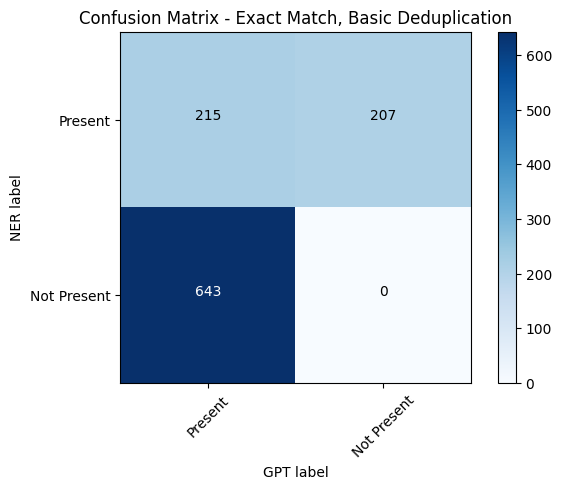

In [13]:
plot_confusion_matrix(np.array([[out2['tp'], out2['fp']], [out2['fn'], 0]]), ['Present', 'Not Present'], normalize=False, title='Confusion Matrix - Exact Match, Basic Deduplication')

In [19]:
for column in list_rows:
    for i in gpt_df_deduplicated[column]:
        # rearrange in alphabetical order
        i.sort()
    for i in ner_df_deduplicated[column]:
        i.sort()

gpt_df_deduplicated["gpe"]

0                                    [maharashtra, pune]
1      [devgarh road, thanwla district nagaur, gurgao...
2                   [chennai, new delhi, salem district]
3                                    [maharashtra, pune]
4               [bihar, east champaran, motihari, patna]
                             ...                        
191                                [maharashtra, mumbai]
192                                 [kantabanji, odisha]
193                           [jabalpur, madhya pradesh]
194                                         [coimbatore]
195                       [assam, dima hasao, new delhi]
Name: gpe, Length: 194, dtype: object

In [ ]:
for column in list_rows:
    gpt_col = "gpt extracted " + column
    ner_col = "ner extracted " + column
    out_df = pd.DataFrame(columns=["file_name", gpt_col, ner_col])
    out_df["file_name"] = gpt_df_deduplicated["file_name"]
    out_df[gpt_col] = gpt_df_deduplicated[column]
    out_df[ner_col] = ner_df_deduplicated[column]
    out_df["true_positives"] = 0
    out_df["false_positives"] = 0
    out_df["false_negatives"] = 0
    for i in range(len(out_df)):
        llm_statutes = out_df.iloc[i][gpt_col] if isinstance(out_df.iloc[i][gpt_col], list) else []
        ner_statutes = out_df.iloc[i][ner_col] if isinstance(out_df.iloc[i][ner_col], list) else []
        
        case_true_positives = 0
        case_false_positives = 0
        case_false_negatives = 0

        if llm_statutes:
            for llm_statute in llm_statutes:
                llm_statute = llm_statute.strip() 

                if not llm_statute:
                    continue
                
                if llm_statute in ner_statutes:
                    case_true_positives += 1
                else:
                    case_false_positives += 1
                
                #calculate false negatives
                case_false_negatives = len(ner_statutes) - case_true_positives
        tp = 0
        fp = 0
        fn = 0
        for item in llm_statutes:
            if item in ner_statutes:
                tp += 1
            else:
                fp += 1
        fn = len(ner_statutes) - tp
        out_df.loc[i, "true_positives"] = tp
        out_df.loc[i, "false_positives"] = fp
        out_df.loc[i, "false_negatives"] = fn
        out_df.loc[i, "precision"] = tp / (tp + fp) if (tp + fp) > 0 else 0
    out_df.to_csv("comparison_" + column + ".csv")

In [13]:
import os

files = os.listdir("../sheets/comparison/")

out = pd.DataFrame(columns=["file_name", "true_positives", "false_positives", "false_negatives", "precision", "recall", "f1_score"])

for file in files:
    if file.endswith(".csv"):
        comp = pd.read_csv("../sheets/comparison/" + file, index_col=0)
        precision = comp["true_positives"].sum() / (comp["true_positives"].sum() + comp["false_positives"].sum())

        recall = comp["true_positives"].sum() / (comp["true_positives"].sum() + comp["false_negatives"].sum())

        f1_score = 2 * (precision * recall) / (precision + recall)
        
        print(f"{file}: {precision}, {recall}, {f1_score}")


comparison_gpe.csv: 0.28832116788321166, 0.20256410256410257, 0.23795180722891565
comparison_judges.csv: 0.7705627705627706, 0.4362745098039216, 0.5571205007824725
comparison_org.csv: 0.2911392405063291, 0.033873343151693665, 0.06068601583113456
comparison_petitioners.csv: 0.4722222222222222, 0.3730407523510972, 0.41681260945709286
comparison_precedents.csv: 0.06647398843930635, 0.02677532013969732, 0.03817427385892116
comparison_provisions.csv: 0.17857142857142858, 0.09193776520509193, 0.12138188608776845
comparison_respondents.csv: 0.13286713286713286, 0.07335907335907337, 0.0945273631840796
comparison_statutes.csv: 0.44786729857819907, 0.22105263157894736, 0.2960062646828504
